# matplotlibで論文やプレゼン資料用の図を作るためのテクニック4選

## はじめに  
　　Pythonでデータ解析を始めてから、論文やプレゼン資料に使う図もPythonで作りたいと思うようになりました。作図ツールはいろいろとありますが、論文など印刷物に利用する単純なグラフとしてはとりあえずmatplotlibがよさそうという結論に至り、matplotlibで作図をいろいろと試してきました。今日は試行錯誤の結果学んだもののうち、1) 重ね棒グラフを書く、2) 色を細かく指定する、3) 凡例を枠外に配置する、4) 図をキャンバス内に納めるという4つのテクニックを紹介したいと思います。

## 環境   
Windows7 + Anaconda (Python3.5)

## コード

### ライブラリ

In [228]:
%matplotlib inline
import numpy as np #デモ用データ生成用。本題とはあまり関係ない。  
import matplotlib.pyplot as plt #今日の話題の中心となる2Dプロッティングライブラリ   
import matplotlib.cm as cm # グラフに使う色を細かく指定するためのクラス
from IPython.display import Image # 図をノートブックにインポートするためのクラス

plt.rcParams['font.size'] = 14 #フォントサイズを設定

### データセット作成

今回は適当に正規分布する数値を使ってデモを作りました。データの生成には平均値と標準偏差、生成個数を指定できるNumpyのrandom.normalを使用。

In [218]:
x = np.array(range(1, 25))
y1 = np.random.normal(20, 5, 24)
y2 = np.random.normal(30, 5, 24)
y3 = np.random.normal(40, 5, 24)
y4 = np.random.normal(50, 5, 24)
y5 = np.random.normal(60, 5, 24)

__テクニック1  重ね棒グラフを書く際にやっておくべきこと__  
  matplotlibで単純に数値を次々と一つの図に描画していくと、後に描画した棒で先に描画した棒が上書きされてしまいます。そのため、n個の値（V1, V2, V3, ..., Vn）を重ねて描画する場合は、V1 + V2 + ... + Vn, V1 + V2 + ... + Vn-1, ... と積算値を作成して多い方から順に描画していく必要があります。もっとクールな書き方はたくさんありますが、単純に書くと以下のような感じで描画用データセットを作ります。

In [215]:
# 重ね棒グラフ用データセットを作成
dataset = {'dat1':(y1+y2+y3+y4+y5), 
           'dat2':(y2+y3+y4+y5), 
           'dat3':(y3+y4+y5), 
           'dat4':(y4+y5), 
           'dat5':y5}

__テクニック2 細かいカラーセットの指定__  
基本のレッド (r)とかグリーン (g)とかブルー(b)だけで書くともっさい感じのグラフになってしまうので、少しおしゃれ感を出すためにmatplotlibのcmを使います。詳しいカラー情報はこちらを参照してください。  
http://matplotlib.org/examples/color/colormaps_reference.html   

今回はいくつかのカラースケールから色を抜粋して利用します。

In [219]:
# カラーセット作成
colors = [cm.RdBu(0.85), cm.RdBu(0.7), cm.PiYG(0.7), cm.Spectral(0.38), cm.Spectral(0.25)]

### 描画

それではいよいよ描画に入ります。今回のデモでは条件を変更して繰り返し実行するため関数を作りました。  

In [238]:
# 描画用関数の作成
def plot(bbax, bbay, bap, adj, adjl, adjr):
    
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

    ax1.bar(x, dataset['dat1'], color=colors[0], edgecolor='w', align='center', label='Data1')
    ax1.bar(x, dataset['dat2'], color=colors[1], edgecolor='w', align='center', label='Data2')
    ax1.bar(x, dataset['dat3'], color=colors[2], edgecolor='w', align='center', label='Data3')
    ax1.bar(x, dataset['dat4'], color=colors[3], edgecolor='w', align='center', label='Data4')
    ax1.bar(x, dataset['dat5'], color=colors[4], edgecolor='w', align='center', label='Data5')
    
    # 凡例描画(位置指定)
    if bap == 999:
        ax1.legend(bbox_to_anchor=(bbax, bbay))
    else:
        ax1.legend(bbox_to_anchor=(bbax, bbay), borderaxespad=bap)

    # サイズ調整
    if adj != 0:
        plt.subplots_adjust(left = adjl, right = adjr)

    # ファイル名
    fname = 'fig' + str(bbax) + str(bbay) + str(bap) + str(adj) + str(adjl) + str(adjr) + '.png'
    plt.savefig(fname, dpi = 300, format='png')

凡例の位置は所定の場所に配置することもできますが (http://matplotlib.org/api/legend_api.html?highlight=legend#module-matplotlib.legend) 、ここではアンカー位置を指定して位置決めする方法をとります。  

まず凡例のアンカー指定は bbox_to_anchorでおこないます。まずアンカー位置を(0, 0), (0, 1), (1, 0), (1, 1)に指定して作図します。

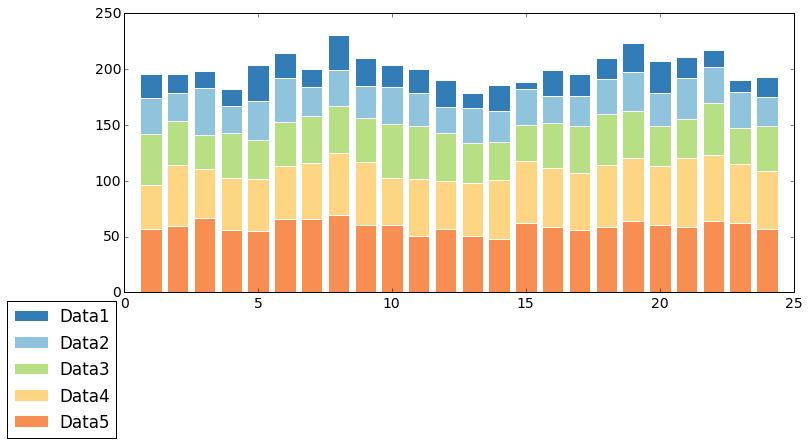

In [239]:
# 凡例のアンカー指定 (bbox_to_anchor=(0, 0)), 枠線との位置調整 (borderaxepad) なし, サイズ調整（subplots_adjust）なし, 
plot(0, 0, 999, 0, 0, 0)

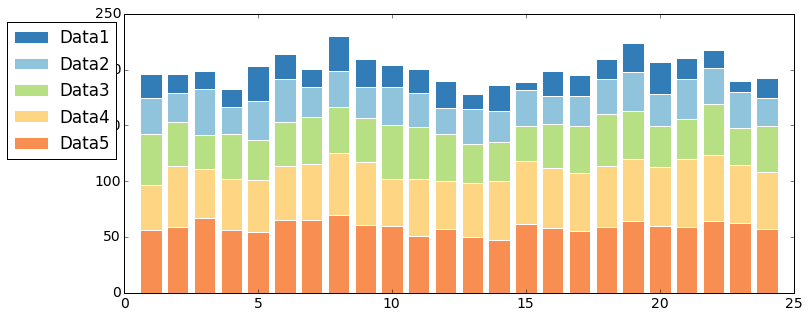

In [240]:
# 凡例のアンカー指定 (bbox_to_anchor=(0, 1)), 枠線との位置調整 (borderaxepad) なし, サイズ調整（subplots_adjust）なし, 
plot(0, 1, 999, 0, 0, 0)

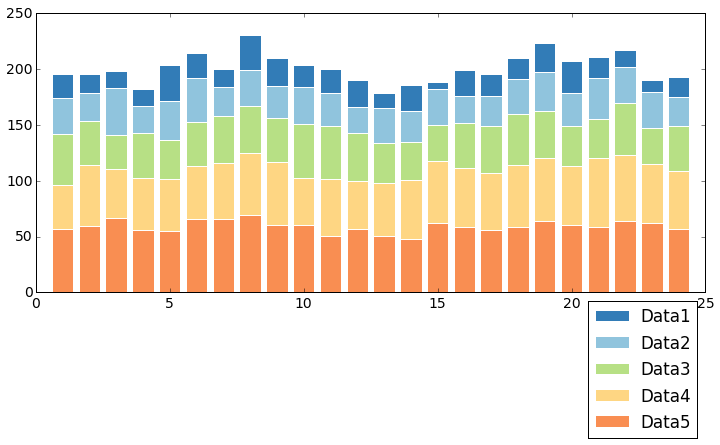

In [241]:
# 凡例のアンカー指定 (bbox_to_anchor=(1, 0)), 枠線との位置調整 (borderaxepad) なし, サイズ調整（subplots_adjust）なし, 
plot(1, 0, 999, 0, 0, 0)

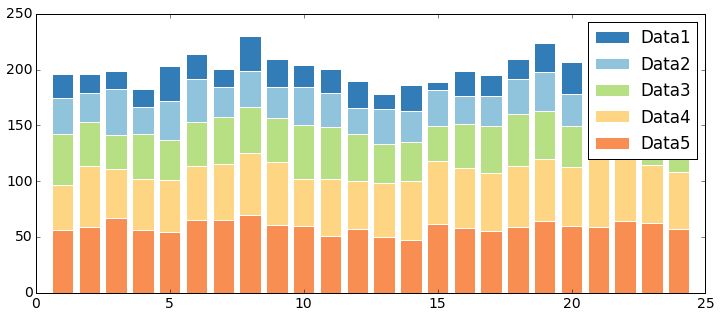

In [242]:
# 凡例のアンカー指定 (bbox_to_anchor=(1, 1)), 枠線との位置調整 (borderaxepad) なし, サイズ調整（subplots_adjust）なし, 
plot(1, 1, 999, 0, 0, 0)

以上のデモでbbbox_to_anchorオプションの指定指定のイメージがわいたでしょうか。これをまとめると以下の図のようになります。

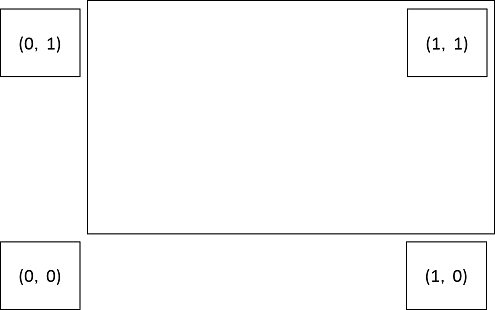

In [234]:
Image("bbox_to_anchor.png")

つまり凡例の右上の角が図の枠線のどこにくるかを指定していることになります。ところで、枠線と凡例との間に微妙な隙間があります。これはデフォルト設定で少し隙間をあけるようになっているようです。この隙間を調整するためにはborderaxepadオプションを使います。

bbox_to_anchor=(0, 0), (0, 1), (1, 0), (1, 1)に加えて枠線との位置調整オプションborderaxepadをゼロに設定する以下のようになります。

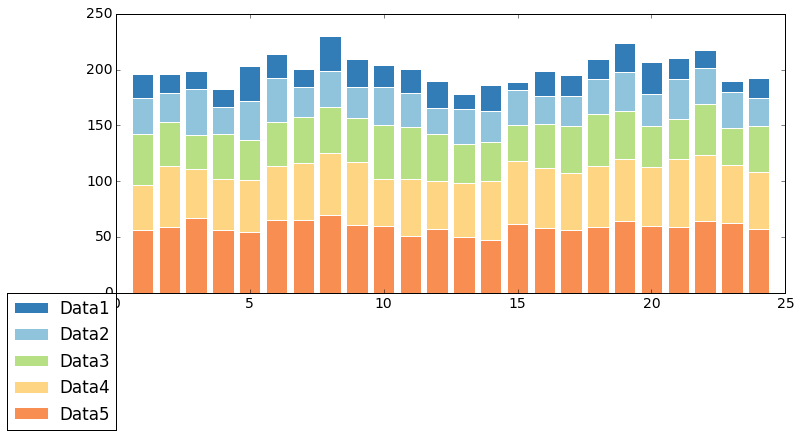

In [243]:
# 凡例のアンカー指定 (bbox_to_anchor=(0, 0)), 枠線との位置調整あり (borderaxepad=0) , サイズ調整（subplots_adjust）なし, 
plot(0, 0, 0, 0, 0, 0)

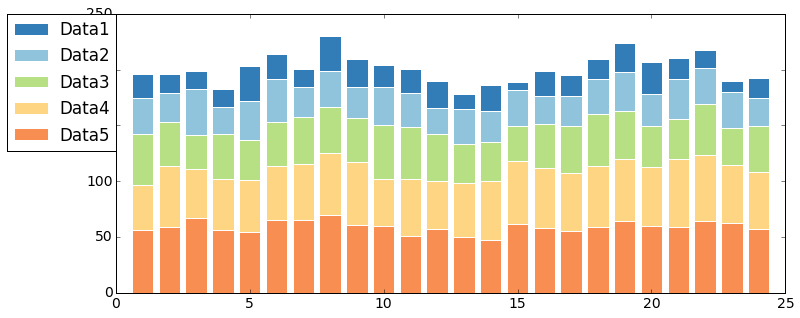

In [244]:
# 凡例のアンカー指定 (bbox_to_anchor=(0, 1)), 枠線との位置調整あり (borderaxepad=0) , サイズ調整（subplots_adjust）なし, 
plot(0, 1, 0, 0, 0, 0)

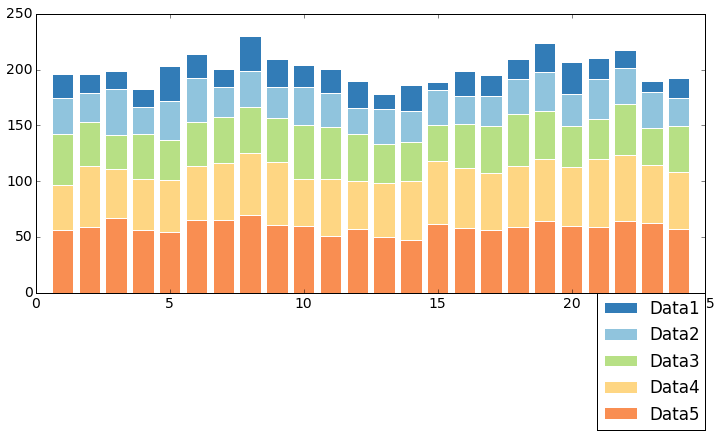

In [245]:
# 凡例のアンカー指定 (bbox_to_anchor=(1, 0)), 枠線との位置調整あり (borderaxepad=0) , サイズ調整（subplots_adjust）なし, 
plot(1, 0, 0, 0, 0, 0)

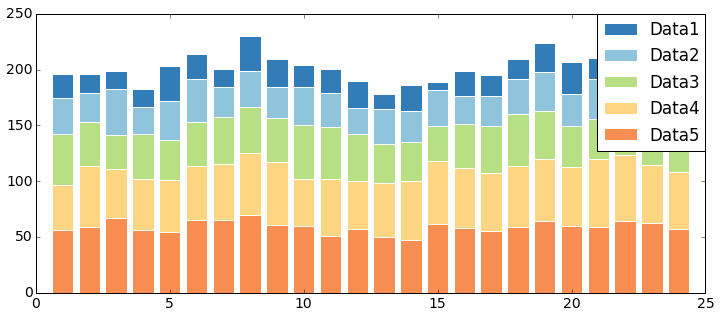

In [246]:
# 凡例のアンカー指定 (bbox_to_anchor=(1, 1)), 枠線との位置調整あり (borderaxepad=0) , サイズ調整（subplots_adjust）なし, 
plot(1, 1, 0, 0, 0, 0)

bbbox_to_anchorとborderaxepadオプション指定のイメージをまとめると以下の図のようになります。

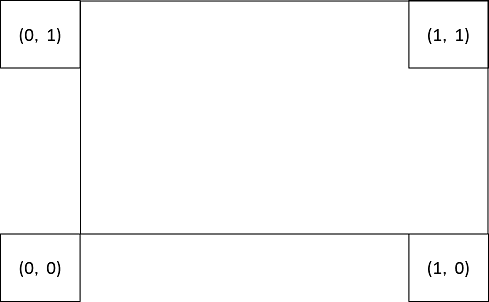

In [247]:
Image('bbox_to_anchor_bap.png')

今回はゼロを指定したので、枠線の角と凡例の角がぴったり重なっていますが、数値を変えれば枠線からの距離が調節できます。数字を大きくするとアンカーの位置から指定した分だけ離れます。たとえば以下のような感じです。

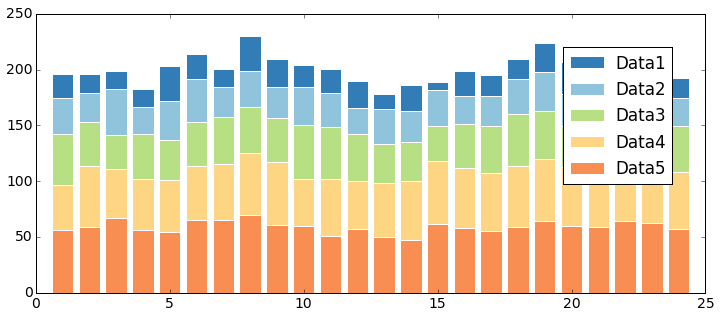

In [248]:
# 凡例のアンカー指定 (bbox_to_anchor=(1, 1)), 枠線との位置調整あり (borderaxepad=2) , サイズ調整（subplots_adjust）なし, 
plot(1, 1, 2, 0, 0, 0)

以上で凡例と図の枠線との位置関係がつかめたと思います。それではいよいよ凡例を外側に描画してみます。凡例を外側に描画する方法は、ずばり、アンカー指定時に値を1以上にすることです。今回は右外側に持ってきたいのでbbox_to_anchor=(1.2, 1)としました。

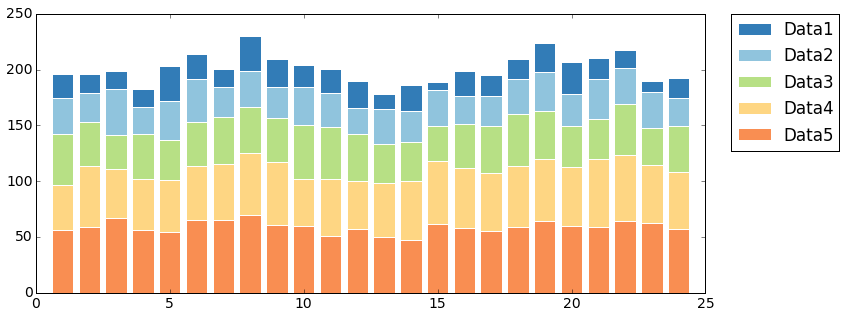

In [272]:
# 凡例のアンカー指定 (bbox_to_anchor=(1.2, 1)), 枠線との位置調整あり (borderaxepad=0) , サイズ調整（subplots_adjust）なし, 
plot(1.2, 1, 0, 0, 0, 0)

右側の枠線がx=1, 上側の枠線がy=1なので、それよりも大きくすればいいのです。つまり枠線は以下のような位置情報を持っています。

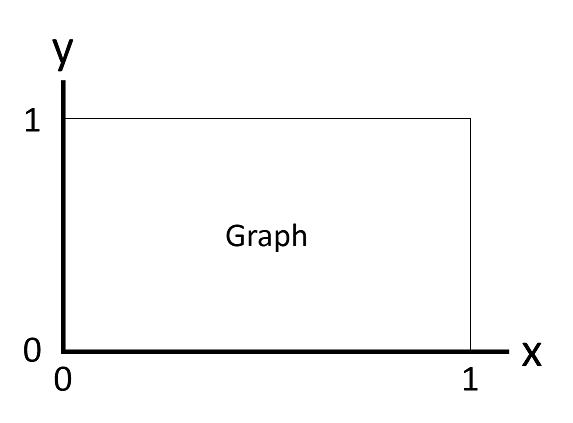

In [253]:
Image("graph_anchor.png")

これで位置関係もわかってめでたしめでたし、という感じもしますが、実はここで終わりではありません。この図を出力するとどうなるか見てみましょう。

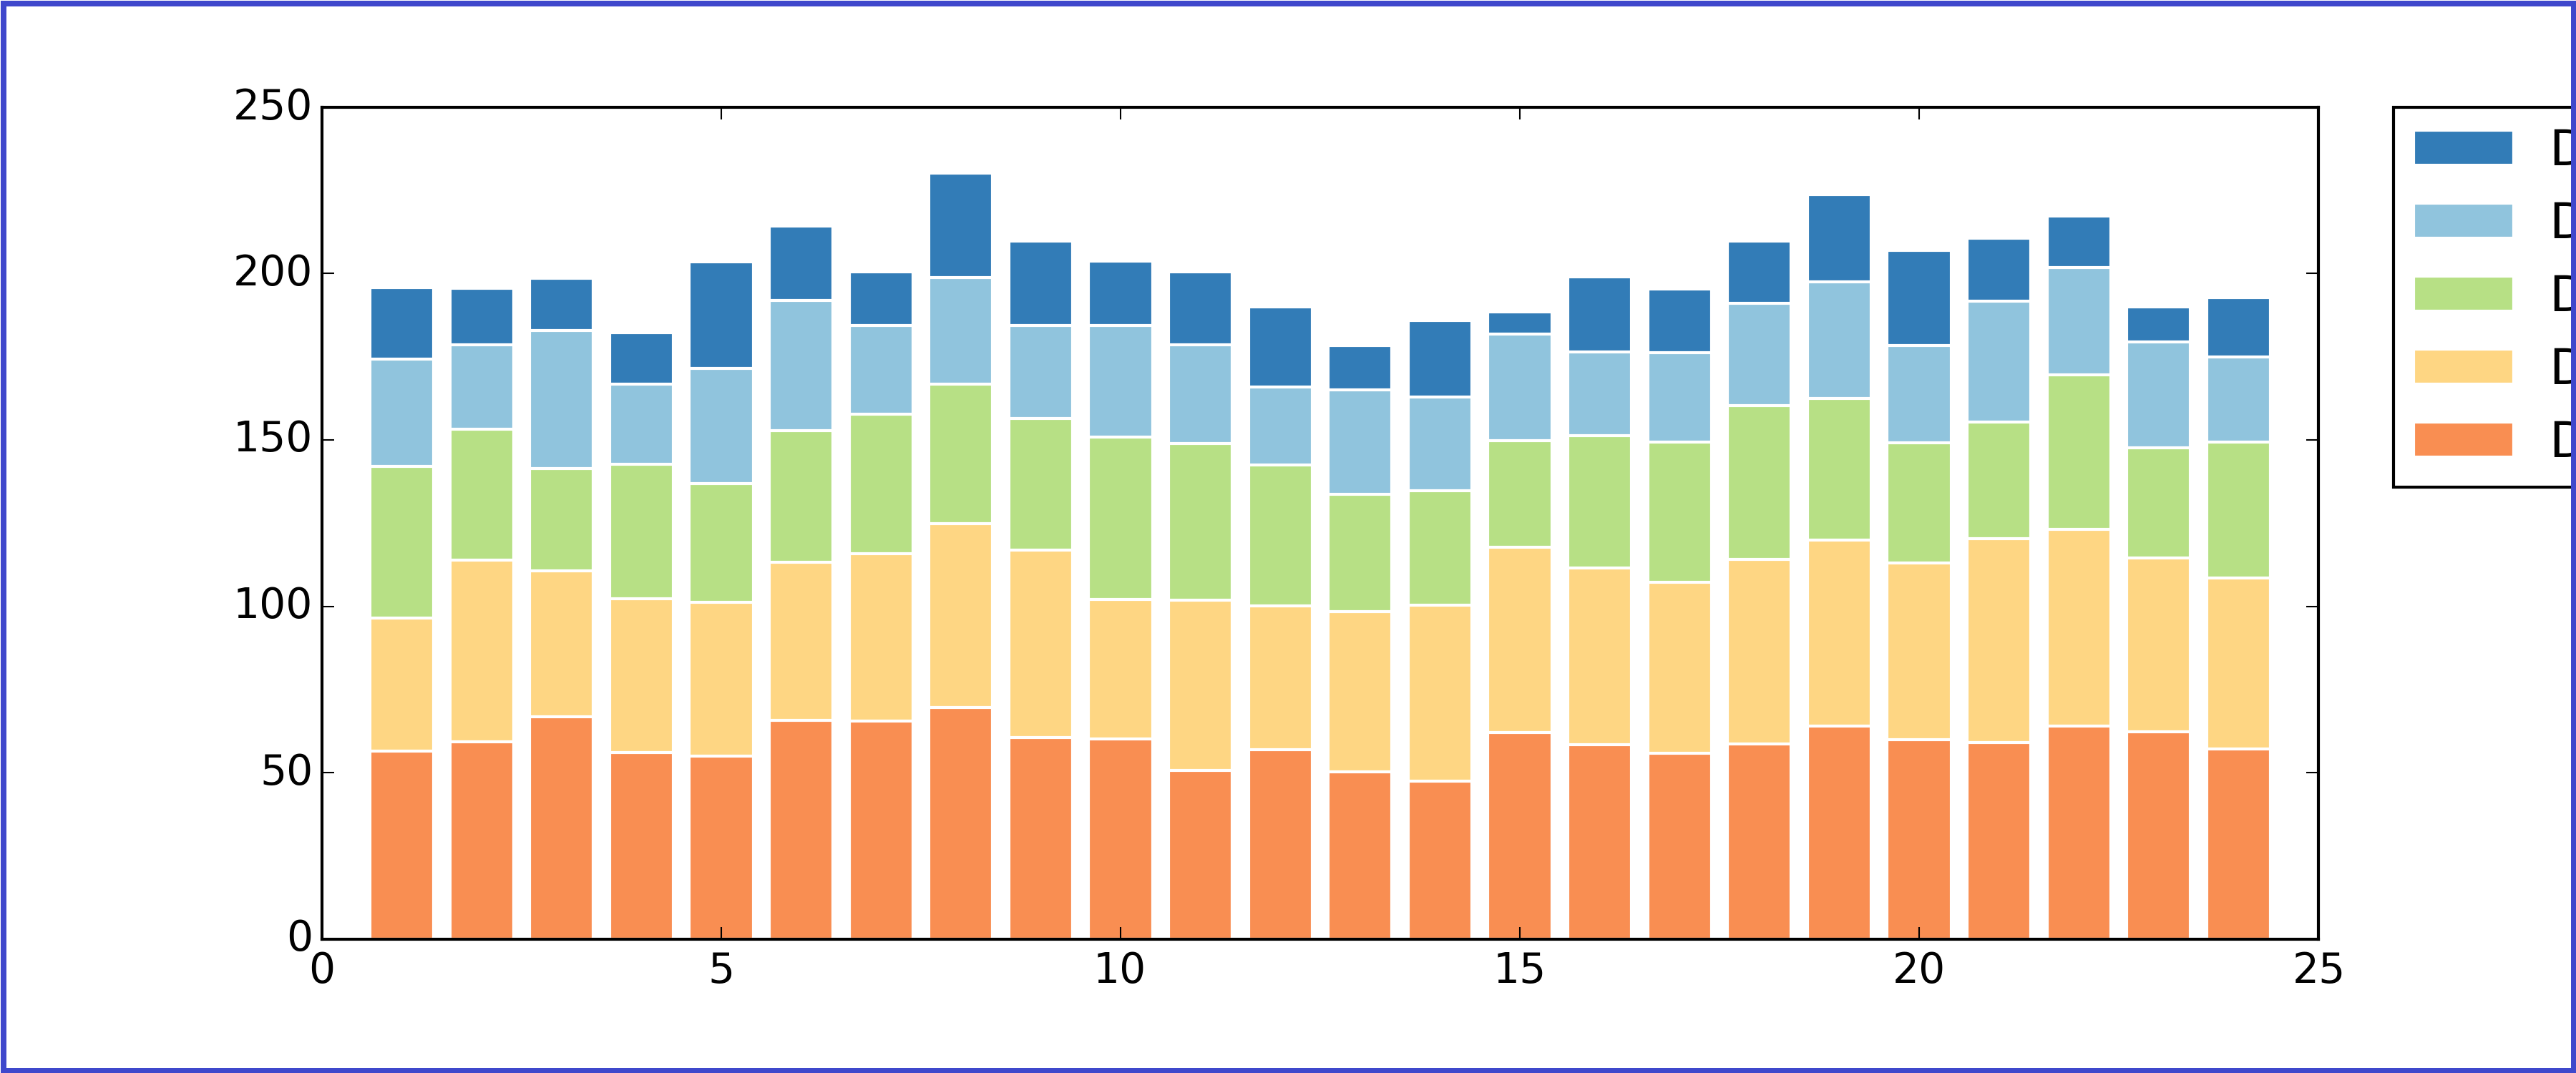

In [261]:
Image("fig1.210000c.png")

わかりやすいように図の周囲に青の枠線をつけてみました。凡例が切れているのがわかると思います。これはグラフ＋凡例を描画しているキャンバスに対してグラフ＋凡例が大き過ぎるために起こっています。これを調整するためにsubplots_adjustオプションを使います。まずはsubplot_adjustオプションを(0, 1), (0.5, 1)で指定した図を例として挙げます。

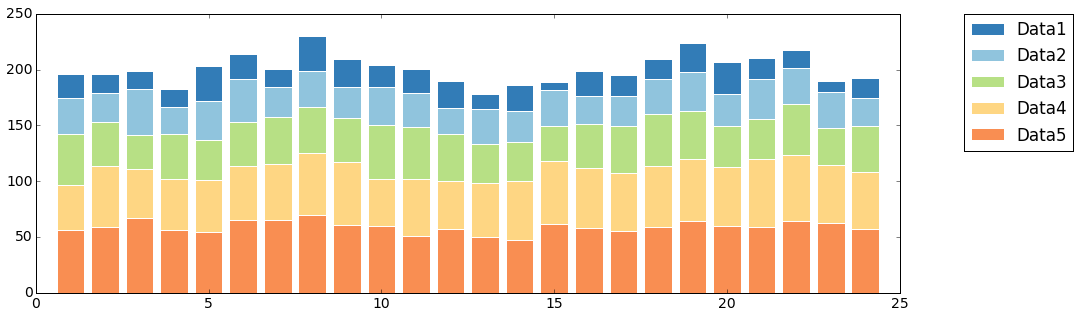

In [258]:
# 凡例のアンカー指定 (bbox_to_anchor=(1.2, 1)), 枠線との位置調整あり (borderaxepad=０) , サイズ調整あり（subplots_adjust =(0, 1)） 
plot(1.2, 1, 0, 1, 0, 1)

この場合の出力ファイルは以下のようになります

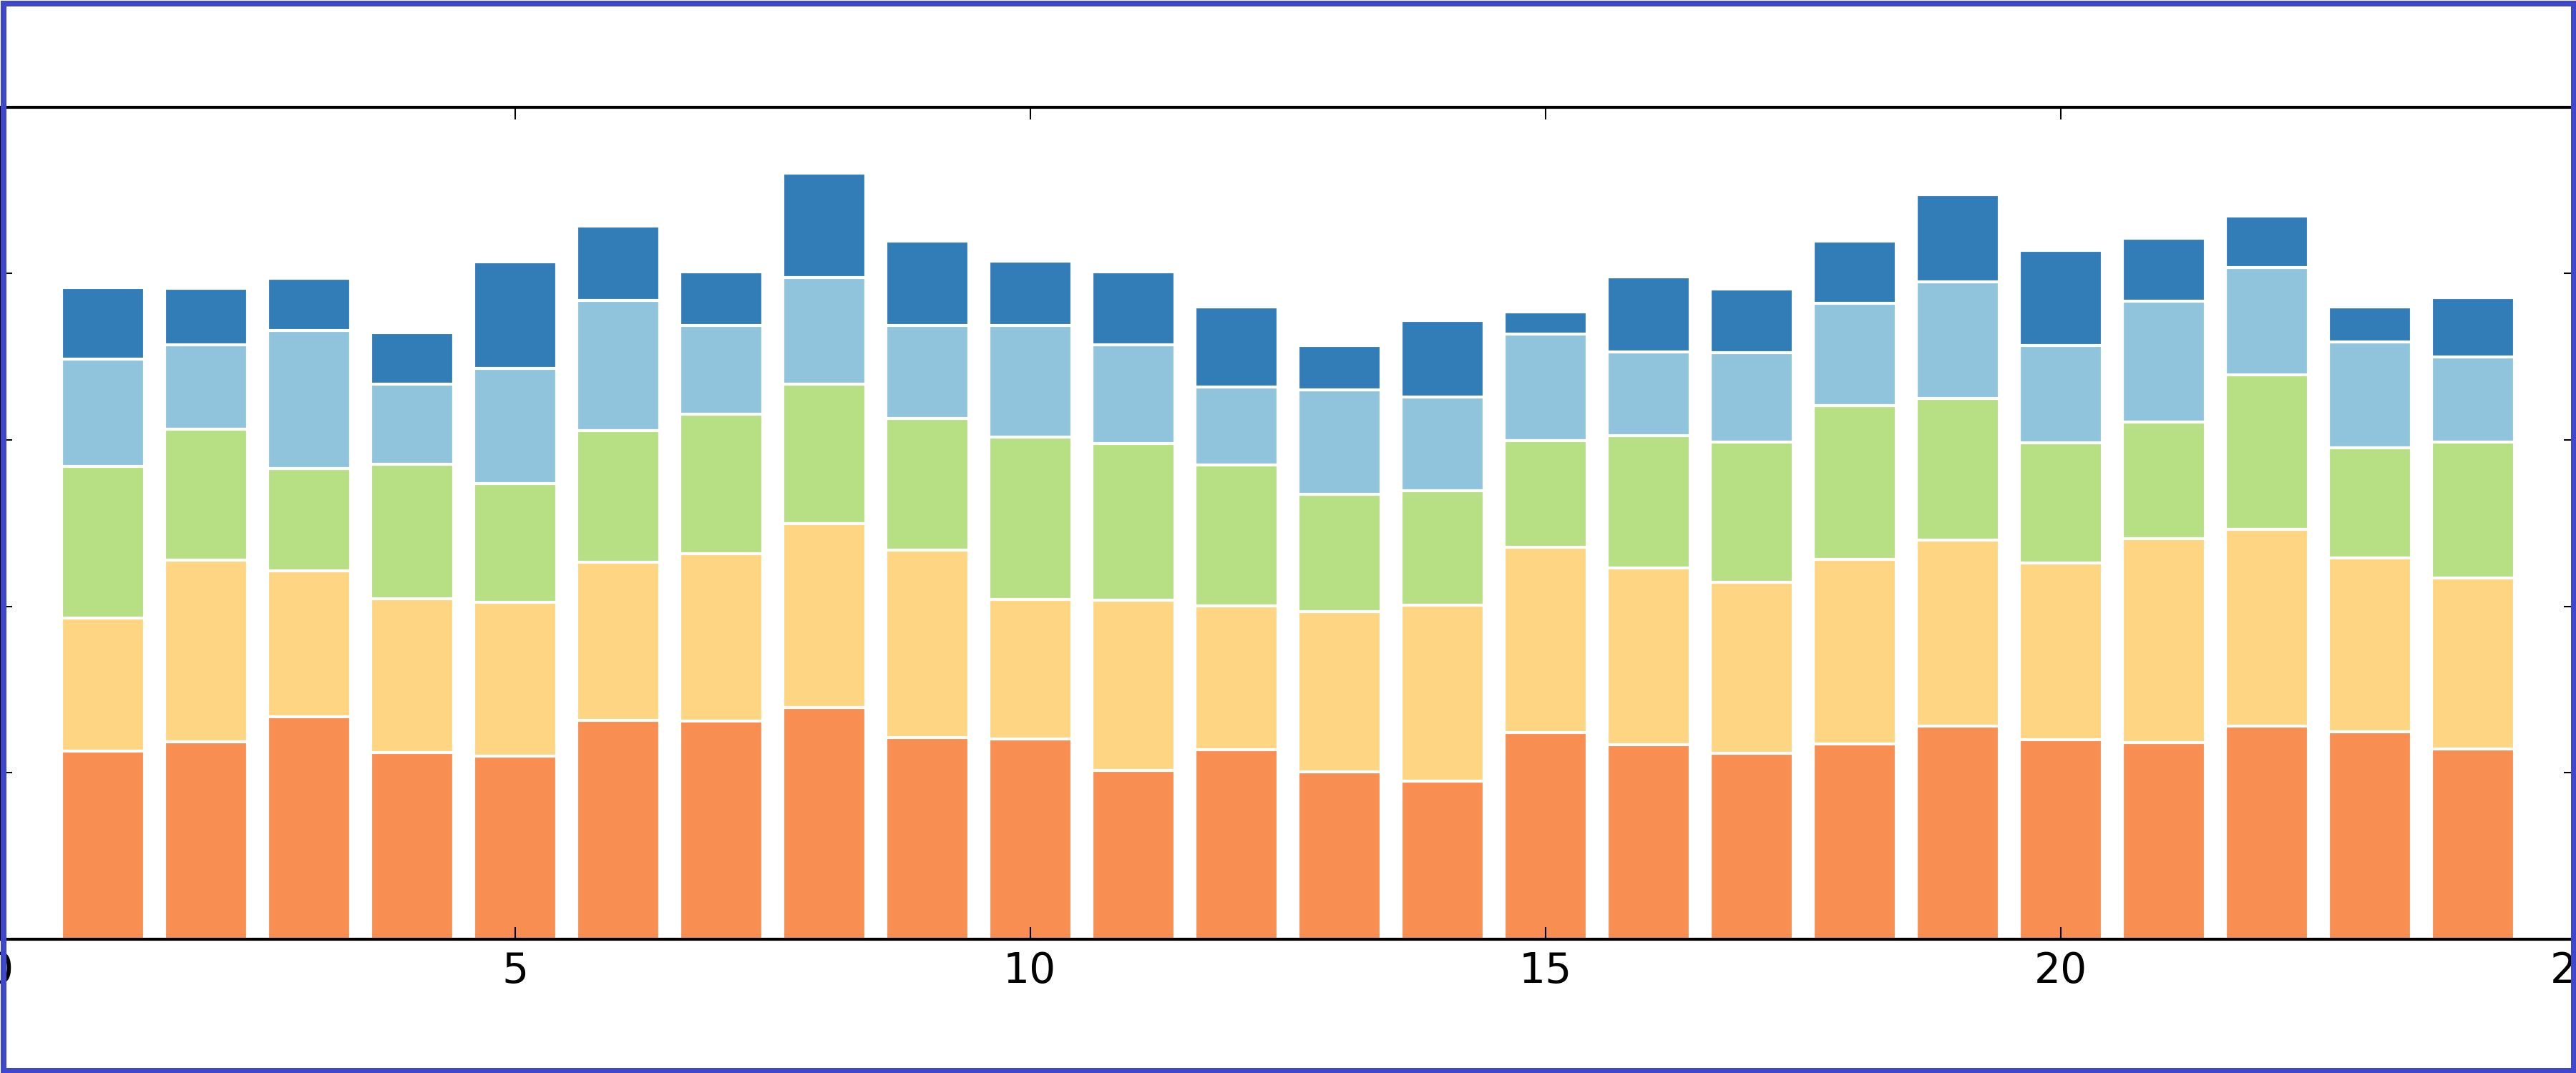

In [263]:
Image("fig1.210101c.png")

グラフの両端がキャンバスの両端にきています。次にsubplot_adjust = (0.5，1)の場合です。

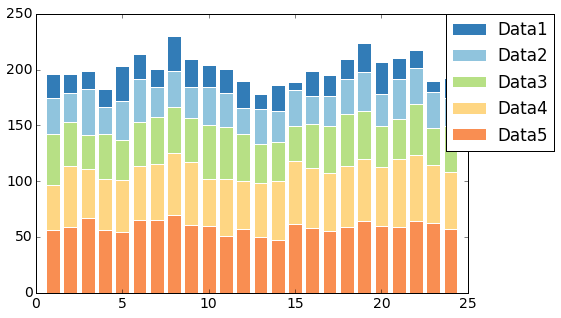

In [266]:
# 凡例のアンカー指定 (bbox_to_anchor=(1.2, 1)), 枠線との位置調整あり (borderaxepad=０) , サイズ調整あり（subplots_adjust =(0.5, 1)） 
plot(1.2, 1, 0, 1, 0.5, 1)

この場合は以下のような出力になります。

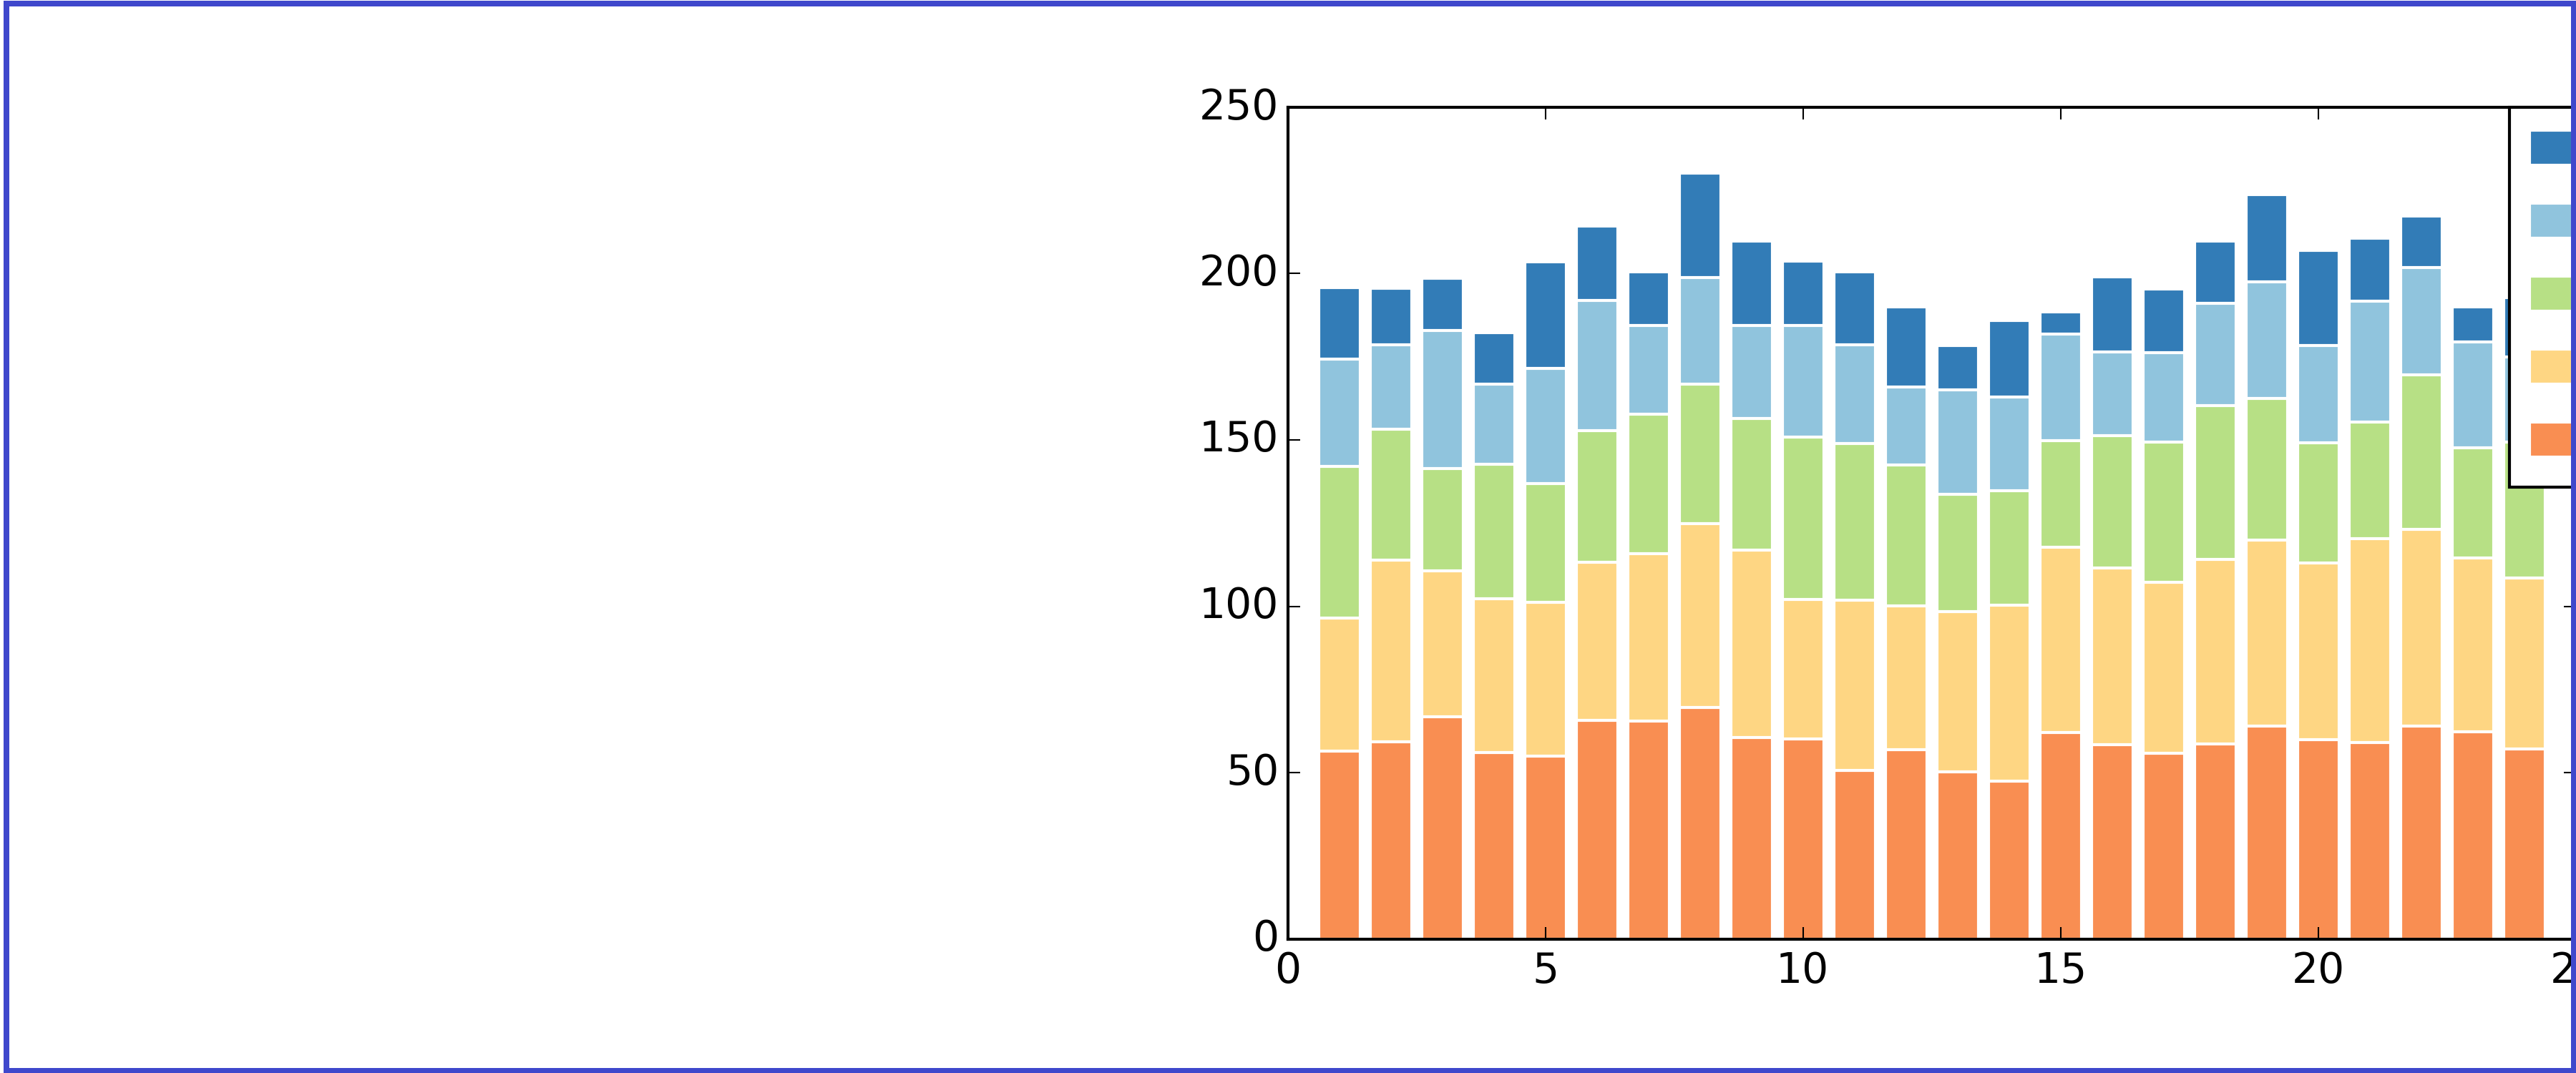

In [268]:
Image("fig1.21010.51c.png")

わかりやすいように実例を示してみましたが、subplot_adustオプションは、つまり、図の左端・右端をキャンバス上のどこに配置するのかを指定します。キャンバスも図と同じく左端をゼロ、右端を1としています。subplot_adust=(0, 1)なら左端がキャンバスのゼロの位置に、右端が1の位置にきます。図は必ず左端が右端よりも左側にくるので、左端の位置の値を右端の位置の値よりも大きくすることはできません。かならず左端位置 < 右端位置です。

In [ ]:
ということで、先ほどの図がキャンバスに収まるように設定します。

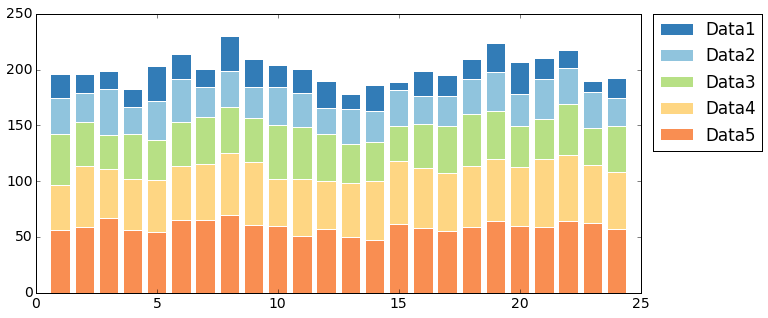

In [269]:
# 凡例のアンカー指定 (bbox_to_anchor=(1.2, 1)), 枠線との位置調整あり (borderaxepad=０) , サイズ調整あり（subplots_adjust =(0.1, 0.8)） 
plot(1.2, 1, 0, 1, 0.1, 0.8)

出力は以下のようになりました。

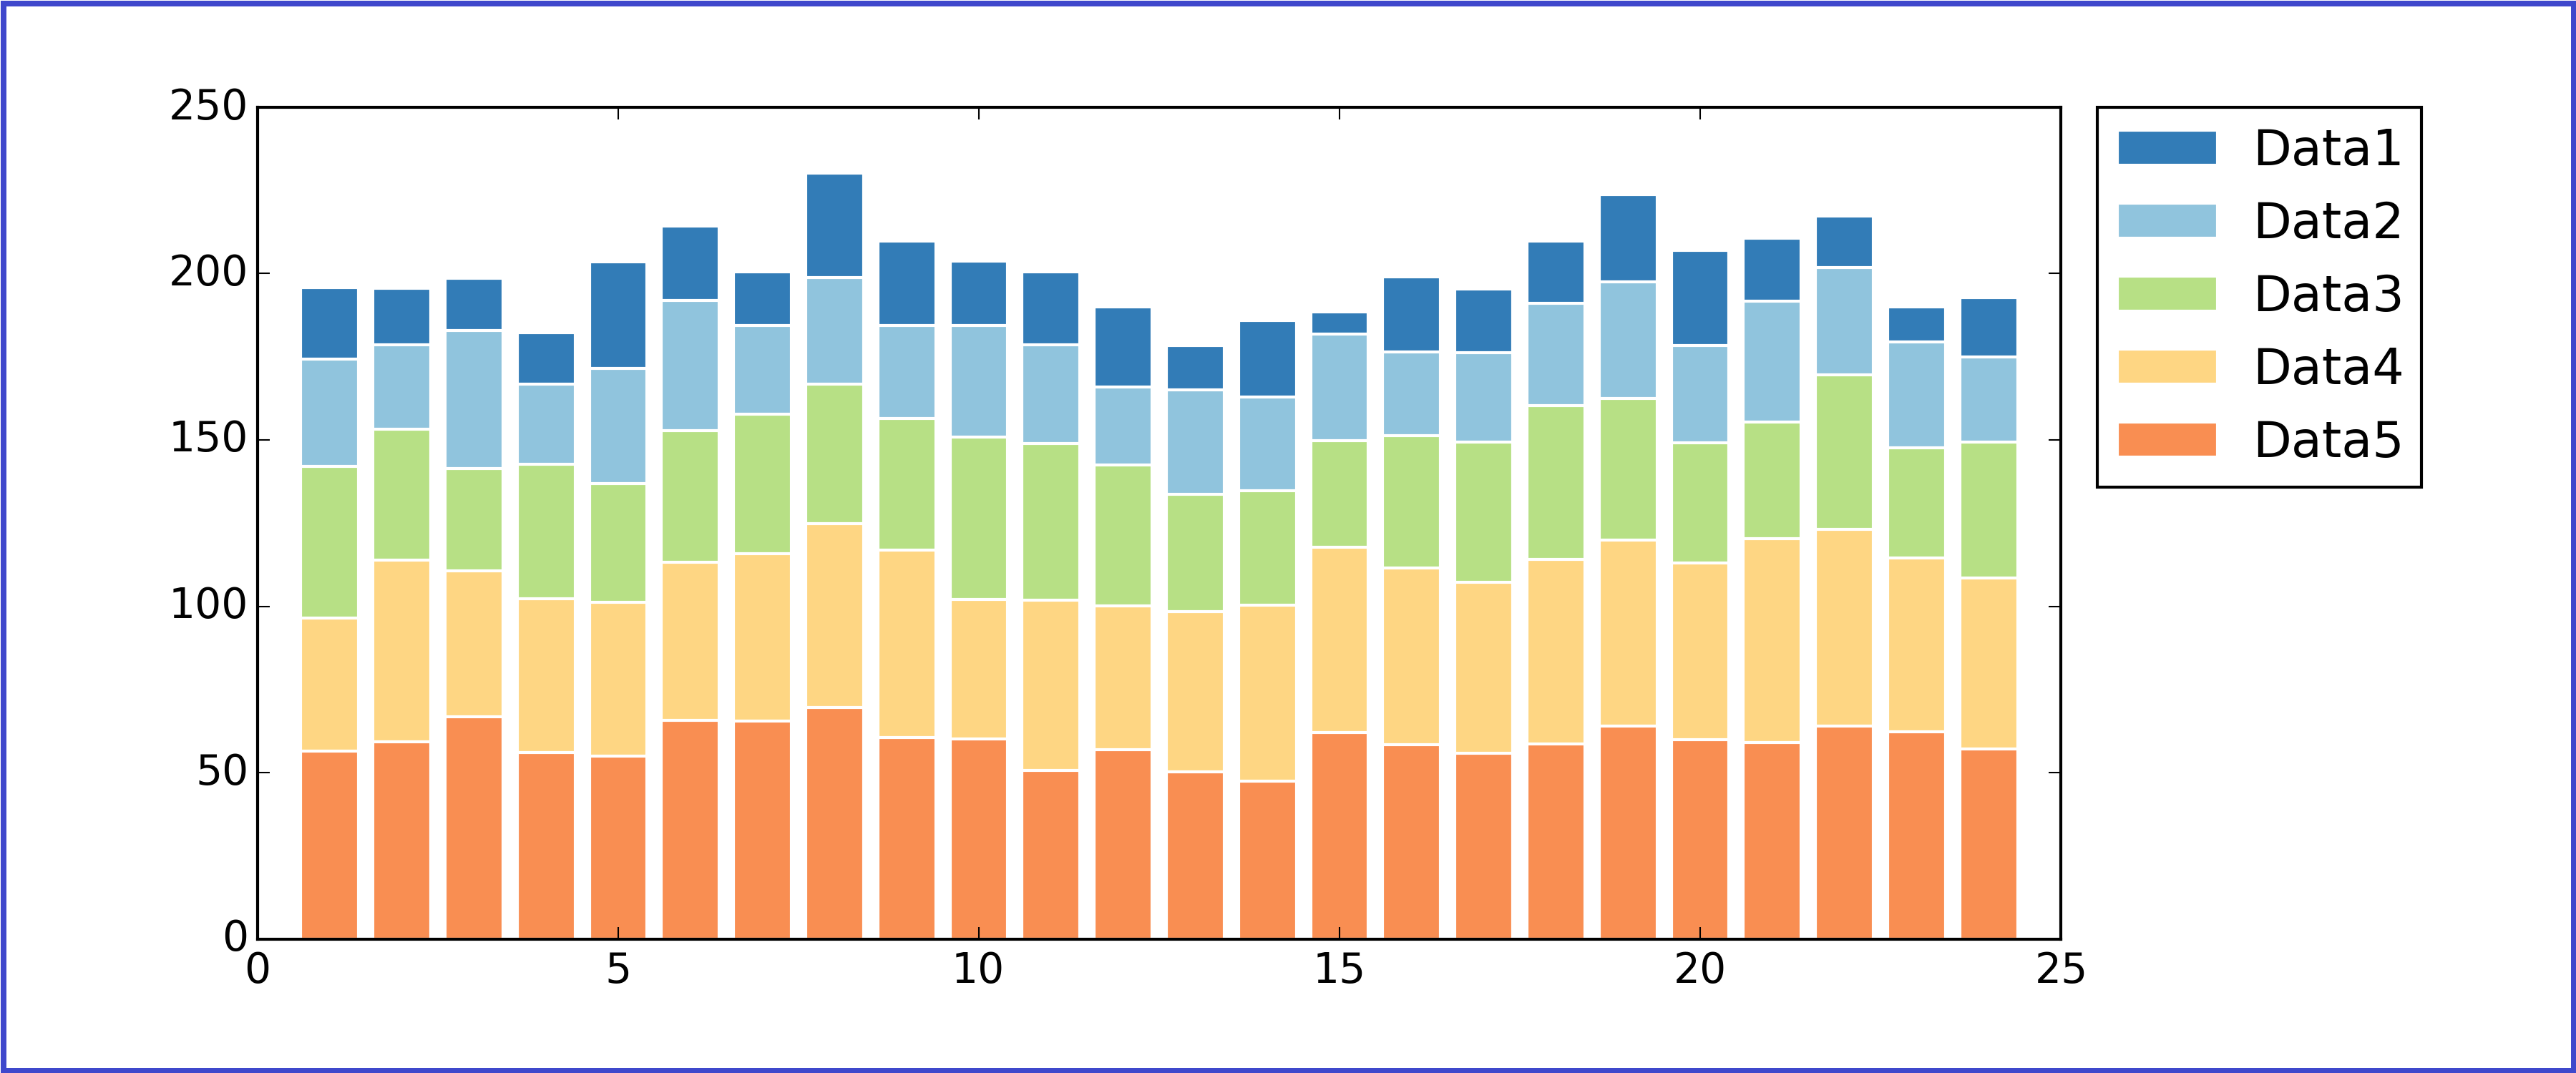

In [270]:
Image("fig1.21010.10.8c.png")

いい感じに収まりました。めでたしめでたし。